<center>
#CSCI-P556: Applied Machine Learning
#Fall 2018
#Assignment #2
</center>
---



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: <!-- Your answers goes here -->

 1) In both the datasets, the validation set is 20 percent of the total sample set.
 
 2) This Observation shows that the number of yes's in the output "y"
    
    Train1.csv yes:Total is 3385/6769 0.500
    Valid1.csv yes:total is 846/1693 is 0.499
    
    
    Train2.csv yes:Total is 3385/28934 0.116
    Valid2.csv yes:Total is 846/7234 is 0.116
    
    Test.csv yes: total is 1058/9043 is 0.116
    This data shows that Train1 and valid1 datasets are balanced with respect to "Y" as its value is 0.5 but Train2.csv and Test.csv are imbalanced for output "y".

### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.

                           
1.   Answer for bullet one : <font color = "green" > [age,balance,day,duration,campaign,pdays,previous] and these features have been normalized. </font>
    
2.   Answer for bullet two: <font color = "green"> [job,marital,education,default,housing,loan,contact,month,poutcome,y]. All these features have one hot coded by using pandas.get_dummies. </font>

3.   Answer for bullet three: 

<font color = "green"> 
If you observe Pdays feature 5060 records out of 6769 records are filled with "-1's" and since it is feature about days it cannot be -1. So as this feature doesn't give any extra information or add value to the dataset so it could be dropped. 
</font>


In [219]:
def feature_normalization(X):

    df = pd.DataFrame(data = X)
    #n = X.shape[1]
    
    mu = df.mean()
    sigma = df.std()
    X_norm = (df-mu)/sigma
    return X_norm

In [220]:
#data = pd.read_csv("train_1.csv")

def data_cleaning(data):
    
    numerical = data.select_dtypes(include = ["number"]).copy()
    numerical = numerical.drop(["pdays"],axis = 1).copy()
    #print(numerical)
    categorical = data.select_dtypes(include = ["object"]).copy()
    #print(categorical)
    for i in numerical:
        numerical[i] = feature_normalization(numerical[i]).copy()

    categorical = pd.get_dummies(categorical).copy()
    categorical = categorical.drop(["y_no","default_no","housing_no","loan_no"],axis = 1)
    output = pd.concat([numerical,categorical],axis = 1)
    
    return(output)
"""    
x = data_cleaning(data)
X = x.iloc[:,:-1]
y = x.iloc[:,-1]
log_reg = LogisticRegression()
log_reg.fit(X,y)
print(log_reg.score(X,y))"""



'    \nx = data_cleaning(data)\nX = x.iloc[:,:-1]\ny = x.iloc[:,-1]\nlog_reg = LogisticRegression()\nlog_reg.fit(X,y)\nprint(log_reg.score(X,y))'

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

#------------------------------------------------#
Best Lamda for Validation dataset 9.09090909090909 ,Best Accuracy 0.8180744240992321
#-----------------------------------------------#
Lamda for Training dataset 9.09090909090909 Best Accuracy for training_dataset 0.8317328999852268
#-----------------------------------------------#
Lamda for Test dataset 9.09090909090909 Best Accuracy for test_dataset 0.7574919827490877


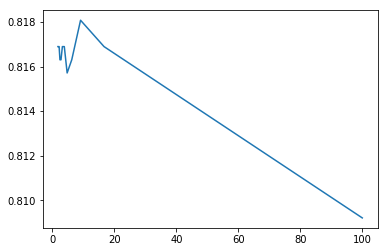

In [221]:
# PROBLEM 1, TASK 2 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
#------------------Loading and Cleaning Train1.csv-------------------#
data = pd.read_csv("train_1.csv")
x = data_cleaning(data)
X = x.iloc[:,:-1]
y = x.iloc[:,-1]
#--------------------------------------------------------------------#
#------------------Loading and Cleaning Valid_1.csv------------------#
validation_dataset = pd.read_csv("valid_1.csv")
validation_dataset = data_cleaning(validation_dataset)


X_validation = validation_dataset.iloc[:,:-1]
y_validation = validation_dataset.iloc[:,-1]
#---------------------------------------------------------------------#
#-----------------Loading and Cleaning Test.csv-----------------------#
test_dataset = pd.read_csv("test.csv")
test_dataset = data_cleaning(test_dataset)
X_test = test_dataset.iloc[:,:-1]
y_test = test_dataset.iloc[:,-1]

    
lamda = []
accuracy = []
c = 0.01    
for i in range(12):
    lamda.append(1/c)
    log_reg = LogisticRegression(C = c)
    log_reg.fit(X,y)
    accuracy.append(log_reg.score(X_validation,y_validation))
    c += 0.05

for i in range(len(accuracy)):
    if accuracy[i] == max(accuracy):
        print("#------------------------------------------------#")
        print("Best Lamda for Validation dataset",lamda[i],",Best Accuracy",max(accuracy))
        print("#-----------------------------------------------#")
        c = 1/lamda[i]
        log_reg = LogisticRegression(C = c)
        log_reg.fit(X,y)
        s = log_reg.score(X_test,y_test)
        t = log_reg.score(X,y)
        print("Lamda for Training dataset",lamda[i],"Best Accuracy for training_dataset", t)
        print("#-----------------------------------------------#")
        print("Lamda for Test dataset",lamda[i],"Best Accuracy for test_dataset", s)
        

plt.plot(lamda,accuracy)

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

In [222]:
# PROBLEM 1, TASK 3 CODE GOES HERE

#-----------Loading and Cleaning Train_2.Csv------------------#

data = pd.read_csv("train_2.csv")


def data_cleaning(data):
    
    numerical = data.select_dtypes(include = ["number"]).copy()
    categorical = data.select_dtypes(include = ["object"]).copy()
     
    for i in numerical:
        numerical[i] = feature_normalization(numerical[i]).copy()

    categorical = pd.get_dummies(categorical).copy()
    categorical = categorical.drop(["y_no","default_no","housing_no","loan_no"],axis = 1)
    output = pd.concat([numerical,categorical],axis = 1)
    
    return(output)
    
x_train2 = data_cleaning(data)
X_train2= x_train2.iloc[:,:-1]
y_train2 = x_train2.iloc[:,-1]

#------------------------------------------------#
Best Lamda 4.761904761904762 ,Best Accuracy 0.9006082388719934
#-----------------------------------------------#
Lamda for Training dataset 4.761904761904762 Best Accuracy for training_dataset 0.9023985622451096
#-----------------------------------------------#


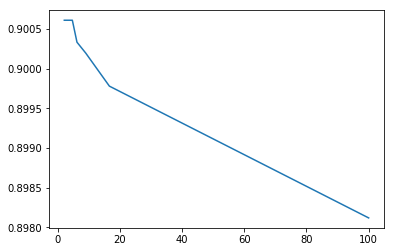

In [228]:
from sklearn.linear_model import LogisticRegression

#-----------Loading and Cleaning Valid_2.csv-------------------#
validation_dataset = pd.read_csv("valid_2.csv")
validation_dataset = data_cleaning(validation_dataset)

#---------------------------------------------------------------#
lamda = []
accuracy = []
c = 0.01
X_validation = validation_dataset.iloc[:,:-1]
y_validation = validation_dataset.iloc[:,-1]

for i in range(10):
    
    lamda.append(1/c)
    log_reg = LogisticRegression(C = c)
    log_reg.fit(X_train2,y_train2)
    accuracy.append(log_reg.score(X_validation,y_validation))
    c = c+0.05
    
for i in range(len(accuracy)):
    if accuracy[i] == max(accuracy):
        print("#------------------------------------------------#")
        print("Best Lamda",lamda[i],",Best Accuracy",max(accuracy))
        print("#-----------------------------------------------#")   
        c = 1/lamda[i]
        log_reg = LogisticRegression(C = c)
        log_reg.fit(X_train2,y_train2)
        #s = log_reg.score(X_test,y_test)
        t = log_reg.score(X_train2,y_train2)
        
        print("Lamda for Training dataset",lamda[i],"Best Accuracy for training_dataset", t)
        print("#-----------------------------------------------#")
        #print("Lamda for Test dataset",lamda[i],"Best Accuracy for test_dataset", s)
        break

plt.plot(lamda,accuracy)

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

Maximum Score for Validation set.csv 0.9044788498755875 Lamda  0.1220703125 Threshold 0.35000000000000003


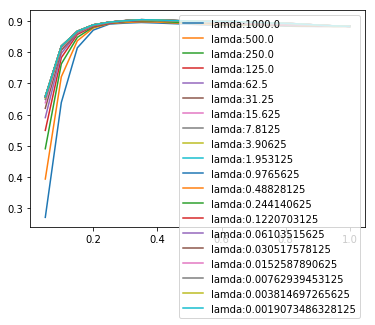

<Figure size 2880x720 with 0 Axes>

In [226]:
# PROBLEM 1, TASK 4 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

training_dataset = pd.read_csv("train_2.csv")
validation_dataset = pd.read_csv("valid_2.csv")

# --- loading Training dataset------#
training_dataset = data_cleaning(training_dataset)
X_train2 = training_dataset.iloc[:,:-1]
y_train2 = training_dataset.iloc[:,-1]

#----loading Validation dataset-----#
validation_dataset = data_cleaning(validation_dataset)
X_validation = validation_dataset.iloc[:,:-1]
#print(X_validation)
y_validation = validation_dataset.iloc[:,-1]
#-----------------------------------#
c = 0.001
maximum = 0
max_out = []
output = {}
for i in range(20):
    
    log_reg = LogisticRegression(C = c)
    log_reg.fit(X_train2,y_train2)
    #print(log_reg.score(X_validation,y_validation))
    THRESHOLD = [0.05*i for i in range(1,21)]
    
    accuracy  = []
    for i in THRESHOLD: 
        
        y_pred = np.where(log_reg.predict_proba(X_validation)[:,1]>= i, 1, 0)
        if accuracy_score(y_validation,y_pred) > maximum:
            max_out = []
            maximum = accuracy_score(y_validation,y_pred)
            max_out.append(1/c)
            max_out.append(i)
        accuracy.append(accuracy_score(y_validation,y_pred))
    #print(THRESHOLD)
    #print("-----------------")
    #print(accuracy)
    output[1/c] = accuracy
    plt.plot(THRESHOLD,accuracy,label = ("lamda:"+str(1/c)))
    plt.legend(loc="upper right")
    
    c *= 2

#print(output)
#print("maximum",maximum)
#print("Max_out",max_out)
plt.figure(figsize=(40,10))
#f,ax = plt.subplot(figsize=(30,10))
print("Maximum Score for Validation set.csv",maximum,"Lamda ",max_out[0],"Threshold",max_out[1])


### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.

Model C > Model B > Model A. 

As Model C we are controlling both theta(Threshold values) and lamda values which gives us better control over the model because the default threshold value set in the Logistic Regression is 0.5 and 0.5 threshold in some cases may not work. if you see Train_2/Valid_2 the output has slighly less number of "yes" so changing threshold along with lamda is a good option. Model B is imbalanced because the output value "Y" has high number of yes when compared with Model A

2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.

The accuracy metric compares the output from Logistic Regression and output from the dataset by matching them and taking a count. This may not be a good indicator of accuracy always. IF the data is assymetric as in the above training set we have to use other parameters such as TP,FP,FN,Confusion Matrix.




## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

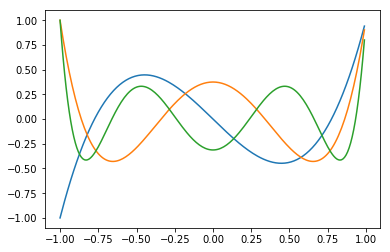

In [215]:
import numpy as np
from scipy.special import legendre



def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    
    
    w = get_coefficients(degree)
    #print(w)
    w_rev = w[::-1]
    p = np.poly1d(w_rev)
    polynomial = np.poly1d(p)
    #print(polynomial)
    x_cord = np.arange(low,high,0.01)
    y_cord = np.polyval(polynomial,x_cord)
    plt.plot(x_cord,y_cord)
    
    
    
    pass

## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
visualize_function(4, -1, 1)
visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [216]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """

        
    w = get_coefficients(degree)
    w_rev = w[::-1]
    p = np.poly1d(w_rev)
    X_train = np.random.uniform (-1,+1,n_train)
    y_train = np.polyval(p,X_train) + np.random.normal(0,sigma,len(X_train))
    
    X_test = np.random.uniform(-1,+1,n_test)
    y_test = np.polyval(p,X_test) + np.random.normal(0,sigma,len(X_test))
    
    
    
    

    return X_train, y_train, X_test, y_test

In [102]:
a,b,c,d = generate_dataset(10,20,20,0.2)


### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

,Quadratic,Degree10
Training Error,0.083471,0.035311
Test Error,0.081933,0.028585


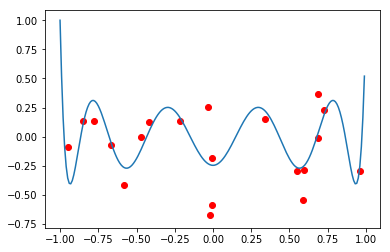

In [217]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

X_train, y_train, X_test, y_test = generate_dataset(10,20,20,0.2)
visualize_function(10,-1,+1)
plt.scatter(X_train,y_train,c = "r")
X_train_dict = {}
X_test_dict = {}
for i in range(11):
    X_train_dict[i] = X_train ** i
    X_test_dict[i] = X_test ** i
    
X_train_df = pd.DataFrame(data = X_train_dict)
X_test_df  = pd.DataFrame(data = X_test_dict)

y_train_df = pd.DataFrame(data = y_train)
y_test_df = pd.DataFrame(data = y_test)
output = {"Quadratic":[],"Degree10":[]}
# Model A Quadratic--------------------------------------------------------------

linear_regr = linear_model.LinearRegression(fit_intercept=False)
linear_regr.fit(X_train_df.iloc[:,:3],y_train_df)

y_pred_train = linear_regr.predict(X_train_df.iloc[:,:3])
y_pred_test = linear_regr.predict(X_test_df.iloc[:,:3])

#print(output_df)
#print("Quadratic")
#print("Training",mean_squared_error(y_train_df, y_pred_train))
output["Quadratic"].append(mean_squared_error(y_train_df, y_pred_train)) 
#print("Test",mean_squared_error(y_test_df, y_pred_test))
output["Quadratic"].append(mean_squared_error(y_test_df, y_pred_test))

# Model B Polynomial---------------------------------------------------------------

linear_regr = linear_model.LinearRegression(fit_intercept=False)
linear_regr.fit(X_train_df,y_train_df)

y_pred_train = linear_regr.predict(X_train_df)
y_pred_test = linear_regr.predict(X_test_df)

#print("Degree 10")
#print("Traning",mean_squared_error(y_train_df,y_pred_train))
output["Degree10"].append(mean_squared_error(y_train_df,y_pred_train))
#print("Test", mean_squared_error(y_test_df,y_pred_test))
output["Degree10"].append(mean_squared_error(y_test_df,y_pred_test))

# -----------------------------------------------------------------------
output_df = pd.DataFrame(data = output)
zero = output_df.index[0]
one = output_df.index[-1]
output_df = output_df.rename(index={one: 'Test Error'})
output_df = output_df.rename(index={zero: 'Training Error'})


output_df

Results : 

Observation1 : Training Error for Quadratic is greater than Degree 10 polynomial.

Reason : Degree 10 polynomial overfits the dataset when compared to Quadratic for the training dataset and therefore the error the degree10 polynomial is less than the quadratic because of the red dots would have lied on the overfitted model.

Observation2: Test Error for Quadratic is less than Degree 10 polynomial.

Reason : As discussed in the before point.. Degree10 polynomial Overfits and therefore having high bias so it does not perform well when it is fed with new test data. Where as Quadratic performs better because it is not highly biased.

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

,Quadratic,Degree_10
Training Error,2.842278e+08,2.362953e+08
Test Error,1.978319e+09,2.411618e+09


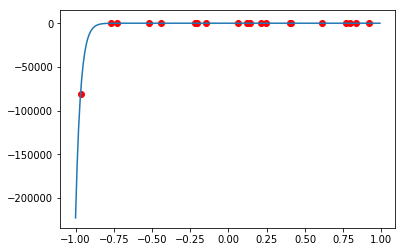

In [218]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

X_train, y_train, X_test, y_test = generate_dataset(45,20,20,0)
visualize_function(45,-1,+1)
plt.scatter(X_train,y_train,c = "r")
output = {"Quadratic":[],"Degree_10":[]}
#--------Converting the data in DataFrame--------------#
X_train_df = pd.DataFrame(data = X_train_dict)
X_test_df  = pd.DataFrame(data = X_test_dict)

y_train_df = pd.DataFrame(data = y_train)
y_test_df = pd.DataFrame(data = y_test)


#-------------------------------------------------------#
#-----------------Quadratic-----------------------------#

linear_regr = linear_model.LinearRegression(fit_intercept=False)
linear_regr.fit(X_train_df.iloc[:,:3],y_train_df)

y_pred_train = linear_regr.predict(X_train_df.iloc[:,:3])
y_pred_test = linear_regr.predict(X_test_df.iloc[:,:3])



#print("Quadratic")
#print("Training",mean_squared_error(y_train_df, y_pred_train))
output["Quadratic"].append(mean_squared_error(y_train_df, y_pred_train))
#print("Test",mean_squared_error(y_test_df, y_pred_test))
output["Quadratic"].append(mean_squared_error(y_test_df, y_pred_test))


#-----------------Degree 10-----------------------------#

linear_regr = linear_model.LinearRegression(fit_intercept=False)
linear_regr.fit(X_train_df.iloc[:,:11],y_train_df)

y_pred_train = linear_regr.predict(X_train_df.iloc[:,:11])
y_pred_test = linear_regr.predict(X_test_df.iloc[:,:11])



#print("Degree 10")
#print("Training",mean_squared_error(y_train_df, y_pred_train))
output["Degree_10"].append(mean_squared_error(y_train_df, y_pred_train))
#print("Test",mean_squared_error(y_test_df, y_pred_test))
output["Degree_10"].append(mean_squared_error(y_test_df, y_pred_test))

output = pd.DataFrame(data = output)
zero = output.index[0]
one = output.index[-1]
output = output.rename(index={one: 'Test Error'})
output = output.rename(index={zero: 'Training Error'})
output

Results:

In this case Noise is 0 . Which means all the generated red points always lie on the curve.So, the curve of Degree10 must perform better on the Training and Test data than the quadratic.

Reason: Since the Degree 10 Polynomial is overfitted and the generated points are always on the curve the overfitted degree 10 model will predict the points more accurately than the quadratic



[0. 0. 0. 0. 0.]
